# Project: Calls to 911

For this project we will be analyzing some call data for [Kaggle](https://www.kaggle.com/mchirico/montcoalert) 911. The data contains the following fields:

* lat: Variável String, Latitude
* lng: Variável String, Longitude
* desc: Variável String, Descrição da Chamada de Emergência
* zip: Variável String, CEP
* título: Variável String, Título
* timeStamp: Variável String, AAAA-MM-DD HH: MM: SS
* twp: Variável String, Township
* addr: Variável String, Endereço
* e: Variável String, variável Dummy (sempre 1)

Just follow this notebook and see a wealth of insights we can have from that data.

## Data and Configuration

<b> Import numpy and pandas </b>

In [66]:
import numpy as np
import pandas as pd

<b>Importing the data visualization libraries used in this notebook</b>

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

<b>Reading the csv file as a DataFrame named df</b>

In [68]:
df = pd.read_csv('911.csv')

<b>Check my DataFrame info using '.info()'</b>

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


<b>Check the header of my DataFrame </b>

In [70]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


## Basic Questions

 <b> Which are the top 5 zip codes in 911 calls? </b>

In [71]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

<b> Which are the top 5  counties of 911 calls? </b>

In [72]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

<b>How many unique title codes are there? </b>

In [73]:
df['title'].nunique()

110

## Creating New Features

<b> In the "title" column there are "Reasons / Departments" specified before the title code. These are "EMS", "Fire" and "Traffic". Let's use .apply () with a custom lambda expression to create a new column named "Reason" that contains this string value.

For example, if the value of the title column is EMS: BACK PAINS / BLESSOR, the value of the Reason column would be EMS. </b>


In [74]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

<b>What is the most common reason for a 911 call based on this new column? </b>

In [75]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<b>Now we use Seaborn to create a countplot of 911 calls based on this new column.</b>

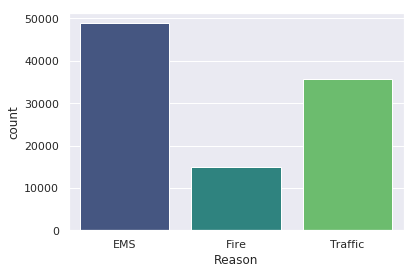

In [76]:
sns.countplot(x='Reason', data=df, palette='viridis')

<b> Now let's start focusing on time information. What is the data type of the objects in the timeStamp column? </b>

In [77]:
type(df['timeStamp'][0])

str

<b>Let's use [pd.to_datetime] (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column of strings to DateTime objects. </b>

In [78]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

<b>Let's use .apply () to create 3 new columns called Hour, Month and Day of Week. We will create these columns based on the timeStamp column.</b>

In [79]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

<b>Notice how the day of the week is an integer of 0-6. Let's use .map () with this dictionary to map the names of the real strings to the day of the week:</b>

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [80]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [81]:
df['Day of Week'] = df['Day of Week'].map(dmap)

<b> Now we will use Seaborn to create a countplot of the "Day of Week" column with the tone based on the Reason column. </b>

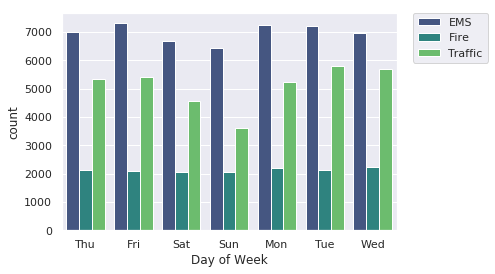

In [83]:
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis' )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<b> Now we will do the same for the month </b>

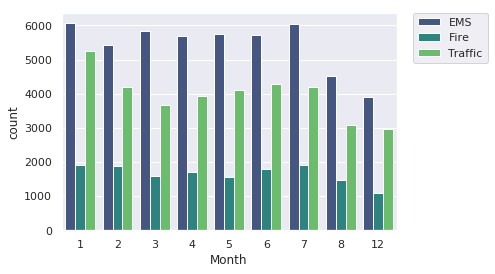

In [85]:
sns.countplot(x='Month', data=df, hue='Reason',palette='viridis' )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<b>Did you notice anything strange?</b>

_____

<b>You may have noticed that you are missing a few months. Let's see if maybe, take this information to traffic as information otherwise, possibly a simple line plot that fills the months that are missing. For this, we need to work with pandas ...</b>

<b>Now create a groupby object named "byMonth", where you group the DataFrame by the month column and use the count () method for aggregation. Use the head () method on this returned DataFrame.</b>

In [87]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<b>Now we will create a simple plot outside the Dataframe indicating the call count per month.</b>

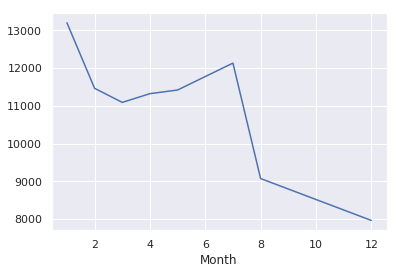

In [88]:
byMonth['twp'].plot()

<b>Now let's use Seaborn's lmplot () to create a linear model in the number of calls per month.</b>

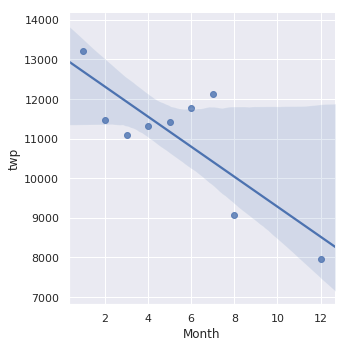

In [89]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

<b> We created a new column named 'Data' that contains the date of the timeStamp column. We will need to use .apply () along with the .date () method. </b>

In [90]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

<b> Now let's group this Data column with groupby. Using count (), create a chart of 911 call counts.</b>

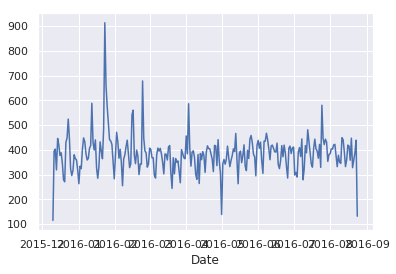

In [95]:
df.groupby('Date').count()['twp'].plot()

<b>Now let's recreate this plot, but create 3 separate plots with each plot representing a Reason for the 911 call</b>

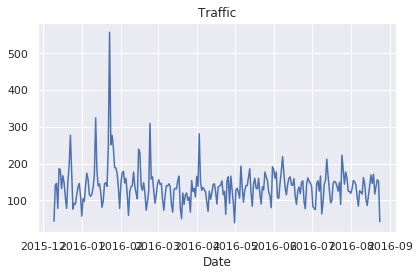

In [92]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

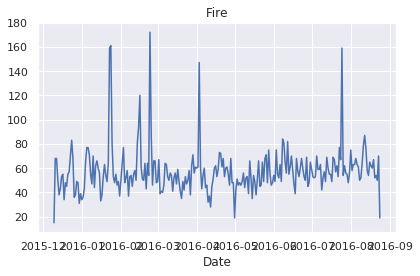

In [93]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

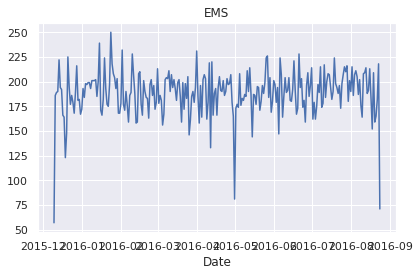

In [101]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

____
<b>Now let's continue to create heat maps with seaborn and our data. First, we must restructure the data frame so that the columns become hours and the Index becomes the Day of the Week. There are many ways to do this, but I would recommend trying to combine groupby with the [unstack] method (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html).</b>

In [96]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<b>Now let's create a heat map using this DataFrame</b>

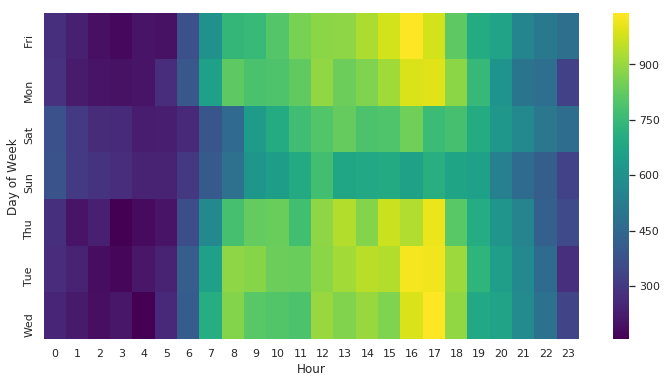

In [102]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

<b> Now let's create a clustermap using this DataFrame. <b>

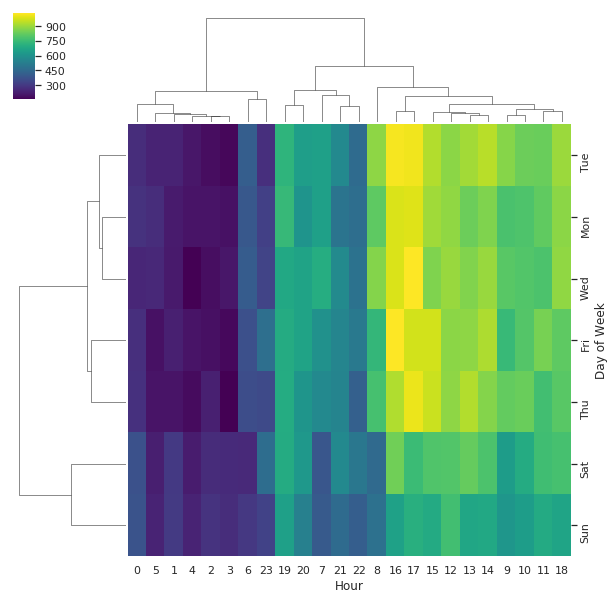

In [42]:
sns.clustermap(dayHour,cmap='viridis')

<b> Now let's repeat these same plots and operations for a DataFrame that shows the month as the column. </b>

In [103]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


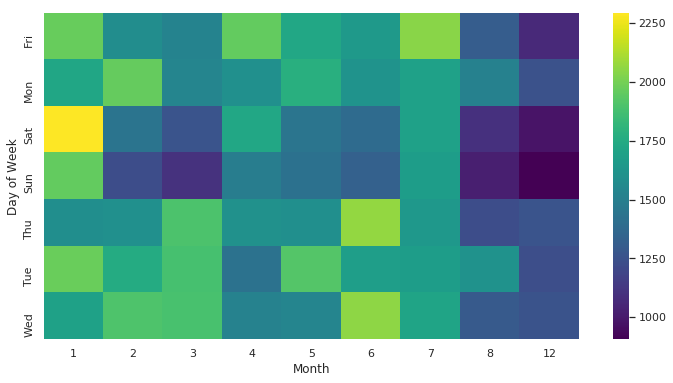

In [104]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

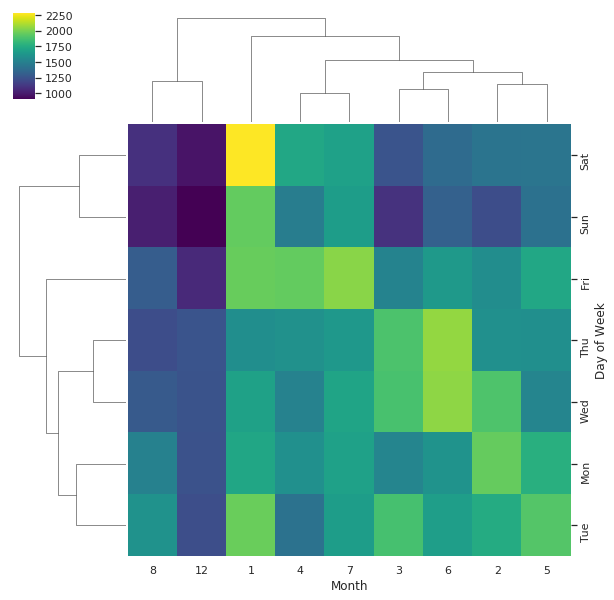

In [105]:
sns.clustermap(dayMonth,cmap='viridis')